# Representación y Descripción

* Uno de los problemas básicos en el desarrollo de un sistema para análisis de imágenes es la selección de un conjunto de características extraídas del objeto de interés para el propósito de clasificación.
* Después de haber segmentado a la imagen en regiones u objetos, los agrupamientos resultantes de pixels son normalmente representados y descritos en formato apropiado para el procesamiento subsecuente.
* Un objeto puede ser representado en términos de sus características externas (bordes) o características internas (pixels que componen el objeto).
* La descripción depende de la representación adoptada y debe permitir la caracterización de su forma sin ambiguiedades y con un número reducido de características o medidas extraidas del objeto.
* Existen diversos esquemas de representación y descripción de objetos, propuestos según el dominio de problema a atacar.
* Por ejemplo, un aspecto deseable para un descriptor de forma es que sean poco afectados en la presencia de ruido y por transformaciones geométricas del tipo de mudanza de escala, rotación y traslación.
* Para la representación y descripción de objetos segmentados de las imágenes, normalmente, el enfoque se da clasificandolas de acuerdo con las características extraídas de los contornos o de las propias regiones que forman los objetos.
* Las técnicas de segmentación descritas anteriormente resultan en agrupamientos de pixels que correspondem a las regiones homogéneas de la imagem ou a los contornos (bordes) de los objetos.
* Las estruturas adequadas de representación facilitan el almacenamiento y la manipulación de los objetos segmentados de la imagem, además de simplificar el cálculo de ciertos descriptores de forma.

## Esquemas de Representación

### Código de la Cadena

* Freeman (1961 y 1974) propuso un esquema conocido como código de la cadena para representar el borde de un objeto:
 * En vez de almacenar las coordenadas absolutas de los pixels, la representación por el código de la cadena utiliza la posición relativa entre los pixels consecutivos del borde.
 * Dado un punto inicial perteneciente al borde, el código es definido por una secuencia formada por las direcciones entre cada pixel y sus vecinos, hasta que todos los pixels del borde sean considerados.
 * La dirección de cada segmento es codificada por un esquema de numeración basado en la vecindad-4 o vecindad-8, ilustrado en la Figura 1.


<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_11-37-08.png" width="50%"\>
<center>Figura 1: Codificación por numeración basada en vecindades</center>

* Esa representación se basa inicialmente en el muestreo del borde a ser codificado por medio de una grilla cuyo espaciamiento determina la resolución de la codificación.
* La Figura 2(a) muestra un contorno y una grilla que están mas próximos de la curva e que serán usados en la codificación. La Figura 2(b) muestra el resultado del muestreo del contorno en la grilla.

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_12-21-30.png" width="100%"\>
<center>Figura 2: Contorno y Codificación Direccional</center>

* El código de la cadena es generado siguiendo el borde del objeto, por ejemplo, en el sentido anti-horario y atribuyendose una dirección a los segmentos que conectan cada par de pixels, de acuerdo con la vecindad-4 o vecindad-8.
* Assumiendo que a posición inicial sea el ponto (3,6), el código de la cadena referente a la curva de la figura 2(b) está dado por la siguiente secuencia: 1170012344443556670
* En la forma descrita el código de la cadena es dependiente del punto inicial del contorno.
* Para tornarlo invariante com respecto a la selección del primer pixel del contorno, un procedimento de normalización consiste en encontrar el pixel que resulte en el menor número entero, considerando la secuencia de dígitos como un número en la base 4 u 8, de acordo con el concepto de vecindad adoptado. Ese pixel es entonces utilizado como o punto inicial.
* Ese proceso es ilustrado en la Figura 3, en que el código de la cadena es obtenido a partir del contorno del objeto de la Figura 2(b), teniendo como punto inicial el pixel (3,6).
* El resultado del primer desplazamiento circular de dígitos, en que el dígito es menos significativo pasa a ser el mas significativo, es ilustrado en la figura 3(b).
* Esto es equivalente al código formado utilizandose o pixel (2,6) como punto inicial.
* El resultado del segundo desplazameiento, mostrado en la figura 3(c), es equivalente al código formado con el pixel (1,5) como punto inicial.
* El código cuyo número entero es mínimo considerando todos los desplazamientos es mostrado en la Figura 3(d), el cual es derivado a partir del pixel (6,5).

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_12-55-35.png" width="40%"\>
<center>Figura 3: Invariancia del Código de la Cadena con respecto a Traslación</center>

* Además de la reducción del espacio de almazenamiento, el código de la cadena puede ser aplicado en varias tareas de procesamiento y análisis de imágenes.
* Freeman (1974) propuso algoritmos para cálculo de perímetro y área basado en el código de la cadena parea contornos cerrados.
* La detección de esquinas y uniones en contornos de objetos descrita anteriormente es otra operación que puede ser realizada con el uso del código de la cadena.
* Una desventaja del código de la cadena es su sensibilidad a pequeñas perturbaciones a lo largo del borde, debido al ruido o a imperfecciones durante el proceso de segmentación.

In [2]:
%matplotlib inline
# This code is based on http://www.cs.unca.edu/~reiser/imaging/chaincode.html
# https://www.kaggle.com/mburger/freeman-chain-code-second-attempt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from math import sqrt
from matplotlib import pyplot as plt
from itertools import chain

In [3]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

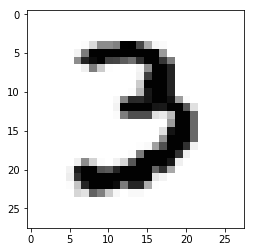

In [4]:
train = pd.read_csv("train.csv")
train[:3]
# Any results you write to the current directory are saved as output.
labels = train['label']
train_images = train.drop('label', axis=1)
train_images.head()
image = np.reshape(train_images[9:10].as_matrix(), (-1, 28)).astype(np.uint8)
plt.imshow(image, cmap='Greys')

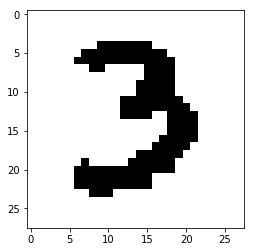

In [5]:
ret,img = cv2.threshold(image,70,255,0)
plt.imshow(img, cmap='Greys')

In [7]:
## Discover the first point 
for i, row in enumerate(img):
    for j, value in enumerate(row):
        if value == 255:
            start_point = (i, j)
            print(start_point, value)
            break
    else:
        continue
    break

(4, 9) 255


In [8]:
img[3:6, 19:22]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [9]:
directions = [ 0,  1,  2,
               7,      3,
               6,  5,  4]
dir2idx = dict(zip(directions, range(len(directions))))

change_j =   [-1,  0,  1, # x or columns
              -1,      1,
              -1,  0,  1]

change_i =   [-1, -1, -1, # y or rows
               0,      0,
               1,  1,  1]

border = []
chain = []
curr_point = start_point
for direction in directions:
    idx = dir2idx[direction]
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
    if img[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

In [10]:
count = 0
while curr_point != start_point:
    #figure direction to start search
    b_direction = (direction + 5) % 8 
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        idx = dir2idx[direction]
        new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
        if image[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    if count == 1000: break
    count += 1

In [11]:
print(count)
print(chain)

79
[3, 3, 3, 3, 3, 3, 3, 3, 5, 4, 5, 5, 5, 5, 4, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 6, 7, 0, 6, 7, 7, 7, 7, 7, 0, 1, 1, 2, 3, 3, 3, 4, 2, 3, 2, 2, 3, 3, 2, 1, 2, 0, 7, 7, 7, 7, 7, 7, 1, 1, 3, 2, 2, 1, 1, 0, 7, 7, 6, 7, 7, 7, 0, 1, 2, 3, 3]


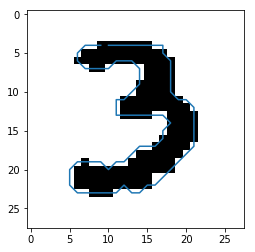

In [12]:
plt.imshow(img, cmap='Greys')
plt.plot([i[1] for i in border], [i[0] for i in border])

### Signatura

* Una signatura es una representación unidimensional del borde de un objeto.
* Una de las formas mas simples está dada por el gráfico de la distancia del centro al borde, en función del ángulo.
* Se entiende entonces que las signaturas son invariantes a traslación y escala, pero no así a  rotación.

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_13-24-15.png" width="70%"\>
<center>Figura 4: Signaturas de un Círculo y de un Cuadrado</center>

### Convex Hull [Cierre Convexo]

* El cierre convexo de una región planar $R$ corresponde al menor polígono convexo conteniendo $R$.
* En análisis de imágenes, el cierre convexo es usado para representar formas poligonais complejas por medio de un polígono mas simple, el cual engloba la forma original.
* Esa forma mas simple, muchas veces, es suficiente para permitir el reconocimento del objeto.
* La figura 4 ilustra o cierre convexo, representado por el polígono en líneas cortadas, para un objeto extraído de la imagen. Cada un de los ángulos de los vértices internos al cierre convexo debe naturalmente, ser menor que 180 grados.

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_13-46-35.png" width="30%"\>
<center>Figura 4: Cierre convezo para una región planar</center>

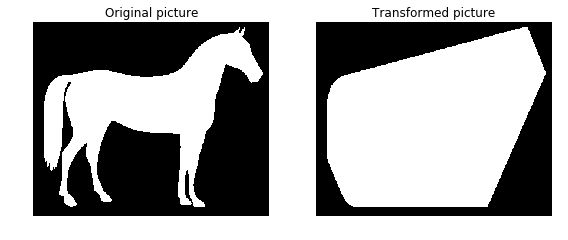

In [13]:
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

# The original image is inverted as the object must be white.
image = invert(data.horse())

chull = convex_hull_image(image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

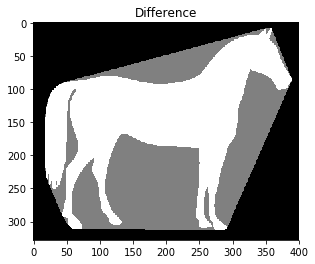

In [14]:
chull_diff = img_as_float(chull.copy())
chull_diff[image] = 2

fig, ax = plt.subplots()
ax.imshow(chull_diff, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Difference')
plt.show()

### Esqueleto de un Objeto

* Es un enfoque que presenta una representación mas reducida y simple de un objeto.
* El esqueleto de un objeto puede ser obtenido por medio de técnicas como: la transformada do eje medio, transformada de distancia, diagramas de voronoi y afinamento de objetos.
* La transformada del eje merdio, propuesta por Blum (1967), determina el conjunto de puntos, internos del objeto, que están mais próximos del borde del objeto.
* Un punto interno del objeto pertencerá al esqueleto del objeto si está, al menos, dos puntos mas próximos del borde.
* De manera mas formal, el eje medio de un objeto puede ser definido como el conjunto de puntos formado por los centros de las mayores circunferencias que se pueden trazar dentro del objeto y cuyas tangentes ocurren en dos o mas puntos del borde.

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_14-32-44.png" width="40%"\>
<center>Figura 5: Eje médio, representado por los segmentos internos, para un objeto rectangular</center>

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_14-35-44.png" width="70%"\>
<center>Figura 6: (a) Esqueleto de una figura hueca. (b) Una figura que tiene el mismo esqueleto que una figura rectangular</center>

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_14-45-29.png" width="70%"\>
<center>Figura 7: Esqueletos de las Letras del Abecedario y los Números</center>

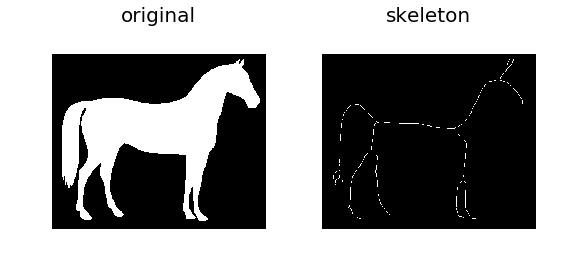

In [15]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

## Descriptores de Bordes

### Diámetro

* El diámetro de un bortde $B$ es definido como la mayor distáncia, $D$, entre dos puntos, $p_i$ y $p_j$, pertenecientes al borde, o sea:

\begin{equation*}
Diámetro(B)=\max\limits_{i,j}[D(p_i,p_j)]
\end{equation*}

* El diámetro es invariante a la rotación y la traslación de un objeto.

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_16-17-43.png" width="30%"\>
<center>Figura 8: Diámetro de un objeto</center>

### Perímetro

* El perímetro representa la longitud del borde de un objeto.
* Uma aproximación para este descriptor puede ser obtenida por el conteo de los pixels a lo largo del borde del objeto en la imagen.
* El perímetro es invariante a traslación y rotación.

## Descriptores de Región

### Excentricidad

La excentricidad es la relación entre el tamaño del eje mayor $A$ y el tamaño del eje menor $B$, ou sea:
\begin{equation*}
Excentricidad=\frac{A}{B}
\end{equation*}

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_15-34-10.png" width="50%"\>
<center>Figura 10: Excentricidad de dos Objetos</center>

### Rectángulo Envolvente

* El rectángulo envolvente de un objeto bidimensional corresponde al rectángulo de dimensiones mínimas que engloba el objeto, cuyos lados son paralelos a los ejes principales (menor y mayor) del objeto.
* Pruebas para verificación o intersección entre objetos o calculos de áreas, por ejemplo, pueden ser simplicados por el uso de rectángulos envolventes.
* El concepto puede ser facilmente extendido para objetos tridimensionales, lo que puede reducir considerablemente o cálculo del volumen de objetos en muchas aplicaciones prácticas.

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_15-50-10.png" width="50%"\>
<center>Figura 11: Ejemplos de rectángulos envolventes</center>

### Convexidad

* La convexidad mide el grdo con que un objeto difiere de un objeto convexo.
* Una medida de convexidad es dada por la relación entre el perímetro convexo y el perímetro del objeto.

\begin{equation*}
Convexidad=\frac{Perímetro Convexo}{Perímetro Obtjeto}
\end{equation*}

* Donde el valor 1 correspondería a objetos convexos y menor que 1 a objetos no convexos.

### Rectangularidad

* La rectangularidad de un objeto está definida como la relación entre el área del objeto y el área del rectángulo envolvente o sea:

\begin{equation*}
Rectangularidad=\frac{AreaObjeto}{AreaRectangulo}
\end{equation*}

* Esta medida puede asumir valores en el intervalo: $]0, 1]$, siendo que el valor 1 corresponde a región perfectamente rectangular.
* Cuando la medida de rectangularidad es baja se entiende que el objeto posee muchas concavidades curvas
* La rectangularidad es invariante a traslación, rotación y escala.

### Solidez

* Mide la densidad de un objeto.
* Una medida de solidez puede ser obtenida por la relación entre el área de un objeto y el área del cierre convexo del objeto

\begin{equation*}
Solidez=\frac{AreaObjeto}{AreaCierreConvexo}
\end{equation*}

* El valor de la solidez es igual a 1 para un objeto sólido y menor que 1 para objetos huecos o con borde irregular.

## Descriptores Locales

* Son descripciones obtenidas a partir de un pixel o región de una imagen.

<img src="Descriptores\Screenshots\2017-11\DescriptoresLocales.jpg" width="50%"\>
<center>Figura 12: Puntos distintivos en una imagen con regiones a describir</center>

* Dependiendo de la información a describir pueden ser invariantes a: traslación, rotación, escala, compresión, iluminación, color, entre otros.

<img src="Descriptores\Screenshots\2017-11\Descriptores_2017-11-04_16-46-23.png" width="50%"\>
<center>Figura 13: Descripción de un punto de la imagen</center>

* Estos descriptores son eficientes para tareas como: seguimiento de objetos, registro de imágenes, recuperación de imágenes por contenido.

<img src="Descriptores\Screenshots\2017-11\Stitching.png" width="50%"\>
<center>Figura 14: Stitching de Imágenes a partir de descriptores locales</center>

## Aplicación

La siguiente aplicación pretende hacer el seguimiento de una persona en un video a partir de una foto de la misma.

##### Importando librerías

In [53]:
import cv2                           #surf
import numpy as np                   #trabaja con arrays/matrices
import matplotlib.pyplot as plt      #plot

##### Leyendo la Imagen Referencia

In [54]:
#mt = cv2.imread('Descriptores\\Screenshots\\2017-11\\Referencia.png') #lee la imagen
mt = cv2.imread('imagenes\\M5_Frente.jpg') #lee la imagen

##### Instanciando un Descriptor SURF

In [68]:
surf = cv2.xfeatures2d.SURF_create()

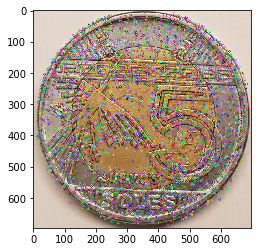

In [69]:
kp_mt = surf.detect(mt,None) #detecta los puntos (keypoints) mas relevantes en la imagen
kp_mt, des_mt = surf.compute(mt,kp_mt) #describe los puntos encontrados (vector de caracteristicas)
mt_kp = cv2.drawKeypoints(mt,kp_mt,None)
plt.imshow(cv2.cvtColor(mt_kp, cv2.COLOR_BGR2RGB))
plt.show()

In [70]:
mi = cv2.imread('imagenes\\dinero.jpg') #lee la imagen
#mi = cv2.cvtColor(mi, cv2.COLOR_BGR2RGB) #convierte la imagen a RGB

kp_mi = surf.detect(mi,None) #detecta los puntos (keypoints) mas relevantes en la imagen
kp_mi, des_mi = surf.compute(mi,kp_mi)

In [71]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

In [72]:
matches = bf.match(des_mt,des_mi)
im_matches = cv2.drawMatches(mt,kp_mt,mi,kp_mi,matches[:100],None, flags=2)
print(len(matches))
plt.imsave("Matches.jpg", cv2.cvtColor(im_matches, cv2.COLOR_BGR2RGB))
#cv2.imshow('im_matches',im_matches)

3722


In [45]:
cap = cv2.VideoCapture(0)
while 1:
    _, mi = cap.read()
    #mi = cv2.cvtColor(mi, cv2.COLOR_BGR2RGB)
    kp_mi = surf.detect(mi,None) #detecta los puntos (keypoints) mas relevantes en la imagen
    kp_mi, des_mi = surf.compute(mi,kp_mi)
    matches = bf.match(des_mt,des_mi)
    im_matches = cv2.drawMatches(mt,kp_mt,mi,kp_mi,matches[1000:1010],None, flags=2)
    cv2.imshow('im_matches',im_matches)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

# Formas Geometricas

In [2]:
import cv2
import numpy as np
import dip_lib as dip
import ipywidgets as wg
from IPython.display import display
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread("imagenes\\BCRP1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0);
gray = cv2.medianBlur(gray,5)
gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,3.5)
kernel = np.ones((5,5),np.uint8)
gray = cv2.erode(gray,kernel,iterations = 1)
gray = cv2.dilate(gray,kernel,iterations = 1)
circulos = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 260, param1=30, param2=65, minRadius=0, maxRadius=0)
if circulos is not None:
        circulos = np.round(circulos[0, :]).astype("int")
        for (x, y, r) in circulos:
            cv2.circle(img, (x, y), r, (0, 255, 0), 4)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);
plt.axis('off');
plt.show()

KeyboardInterrupt: 

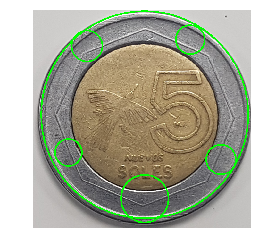

In [46]:
plt.imshow(img[690:1370,1670:2350]);
plt.axis('off');
plt.show()

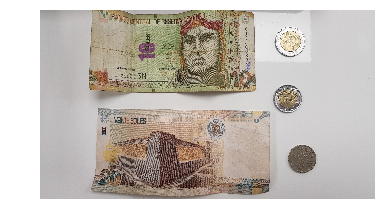

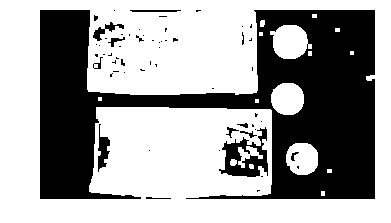

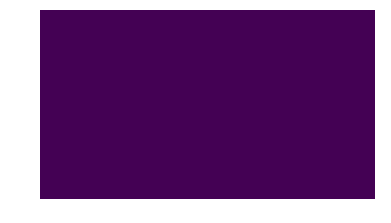

In [43]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('imagenes\\BCRP1.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB));
plt.axis('off');
plt.show()
gray = cv2.GaussianBlur(gray,(5,5),0);
gray = cv2.medianBlur(gray,5)
gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,3.5)

kernel = np.ones((3,3),np.uint8)
gray = cv2.dilate(gray,kernel,iterations = 1)

kernel = np.ones((50,50),np.uint8)
gray = cv2.erode(gray,kernel,iterations = 1)

h, w = gray.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv

#gray = cv2.erode(gray,kernel,iterations = 1)
#gray = cv2.dilate(gray,kernel,iterations = 1)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(cv.cvtColor(thresh,cv.COLOR_GRAY2RGB));
plt.axis('off');
plt.show()

plt.imshow(im_out);
plt.axis('off');
plt.show()

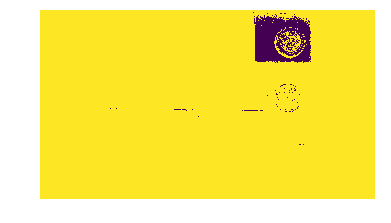

In [46]:
plt.imshow(im_floodfill);
plt.axis('off');
plt.show()

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers);
plt.axis('off');
plt.show()

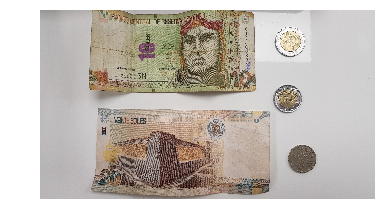

In [68]:
circulos = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1, 260, param1=30, param2=65, minRadius=0, maxRadius=0)
if circulos is not None:
        circulos = np.round(circulos[0, :]).astype("int")
        for (x, y, r) in circulos:
            cv2.circle(img, (x, y), r, (0, 255, 0), 4)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);
plt.axis('off');
plt.show()

In [70]:
 plt.imsave("Segmentado.png", img)

In [88]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('imagenes\\Peru_monedas.jpg')

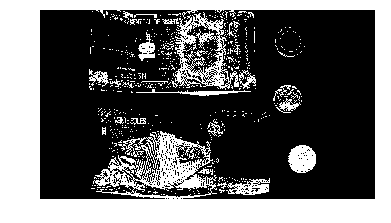

In [53]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
 
# Read image
im_in = cv2.imread("imagenes\\BCRP1.jpg", cv2.IMREAD_GRAYSCALE)
th, im_th = cv2.threshold(im_in, 120, 255, cv2.THRESH_BINARY_INV)

plt.imshow(cv2.cvtColor(im_th, cv2.COLOR_GRAY2RGB));
plt.axis('off');
plt.show()

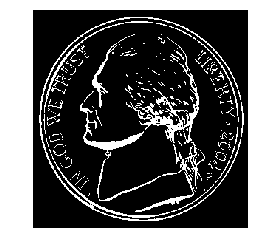

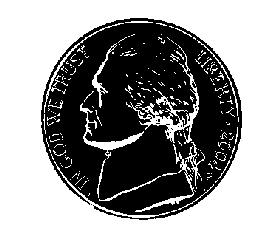

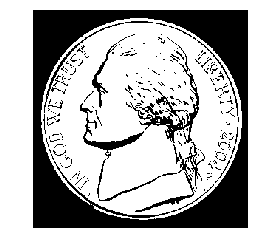

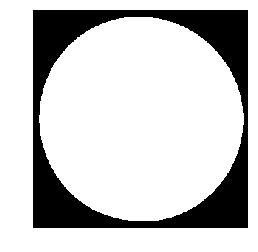

In [49]:
import cv2;
import numpy as np;
 
# Read image
im_in = cv2.imread("imagenes\\coin.jpg", cv2.IMREAD_GRAYSCALE);
 
# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
 
th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV);
 
# Copy the thresholded image.
im_floodfill = im_th.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv
 
# Display images.

plt.imshow(cv2.cvtColor(im_th, cv2.COLOR_GRAY2RGB));
plt.axis('off');
plt.show()

plt.imshow(cv2.cvtColor(im_floodfill, cv2.COLOR_GRAY2RGB));
plt.axis('off');
plt.show()

plt.imshow(cv2.cvtColor(im_floodfill_inv, cv2.COLOR_GRAY2RGB));
plt.axis('off');
plt.show()

plt.imshow(cv2.cvtColor(im_out, cv2.COLOR_GRAY2RGB));
plt.axis('off');
plt.show()